# Exploratory Data Analysis (EDA)

In [ ]:
!pip install -r requirements.txt

In [ ]:
import numpy as np
import pandas as pd
import re
import pickle
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, save
from bokeh.models import ColumnDataSource
from bokeh.transform import cumsum
from bokeh.io import curdoc
curdoc().theme = 'dark_minimal'

In [ ]:
ca_df = pd.read_csv('comcast_consumeraffairs_complaints.csv')
ca_df.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [ ]:
fcc_df = pd.read_csv('comcast_fcc_complaints_2015.csv')
fcc_df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


In [ ]:
peacock_theme = ['#cc004c','#f37021','#fcb711','#6460aa','#0089d0','#0db14b','#ffc0cb','#00ffff']

In [ ]:
csat = len(ca_df.loc[ca_df['rating']>=4])/len(ca_df)
print("Customer Satisfaction Score calculated for this Dataset is {:.2f}%".format(csat*100))

Customer Satisfaction Score calculated for this Dataset is 0.90%


In [ ]:
rating_df = pd.DataFrame({'class': ['0', '1', '2', '3', '4', '5'],
                          'percent' : ca_df['rating'].value_counts(normalize=True).sort_index()*100,
                          'angle': ca_df['rating'].value_counts(normalize=True).sort_index() * 2 * np.pi,
                          'color': peacock_theme[0:6]})
rating_df

,class,percent,angle,color
0,0,27.566708,1.732067,#cc004c
1,1,65.983389,4.145859,#f37021
2,2,4.594451,0.288678,#fcb711
3,3,0.954232,0.059956,#6460aa
4,4,0.335748,0.021096,#0089d0
5,5,0.565471,0.035530,#0db14b


In [ ]:
rating_src = ColumnDataSource(rating_df)
sorted_dates = ca_df['posted_on'].sort_values().reset_index(drop=True).tolist()
rating_plt_title = 'Ratings {} - {} for the user reviews'.format(sorted_dates[0], sorted_dates[-1])

rating_plt = figure(title=rating_plt_title, tools=['save', 'hover'], tooltips='@percent{0.00}%')

rating_plt.wedge(x=0, y=0, radius=0.8, source=rating_src, start_angle=cumsum('angle', include_zero=True),
                 end_angle=cumsum('angle'), fill_color='color', line_color=None, legend_field='class')

rating_plt.axis.visible = False
rating_plt.grid.grid_line_color = None
rating_plt.legend.orientation = 'horizontal'
rating_plt.legend.location = 'top_center'
output_notebook()
show(rating_plt)

# Time series analysis

In [ ]:
ca_df['posted_on'] = pd.to_datetime(ca_df['posted_on'])

groupby_posted_on = ca_df.groupby('posted_on').count()

ts_src = ColumnDataSource(groupby_posted_on)

ts_plt_title = 'Number of reviews per day {} - {}'.format(sorted_dates[0], sorted_dates[-1])
ts_plt = figure(title=ts_plt_title, x_axis_type='datetime', tools=['save', 'hover'], tooltips=[('Count', '@rating')])

ts_plt.line(x='posted_on', y='rating', line_width=2, source=ts_src, color=peacock_theme[0])

ts_plt.yaxis.axis_label = 'Number of Reviews'

show(ts_plt)

In [ ]:
groupby_posted_on.loc[groupby_posted_on['rating'] > 50]

ca_df.loc[ca_df['posted_on'] == '2016-02-24']

,author,posted_on,rating,text
179,"Joshua of Philadelphia, PA",2016-02-24,1,My modem is directly connected to my computer....
1817,"Pene of Las Vegas, NV",2016-02-24,3,The field technician was great. However it too...
1818,"Beverly of Chesterfield, VA",2016-02-24,3,Had issue getting voice mail but customer serv...
1819,"John of Berkeley, CA",2016-02-24,3,"They're generally curious, knowledgeable, and ..."
1820,"Yvonne of Mt. Juliet, TN",2016-02-24,2,It's so difficult to reach them. I usually had...
...,...,...,...,...
1875,"Cynthia of Canton, GA",2016-02-24,1,"Minimally, it takes five minutes before you re..."
1876,"peggy of Boulder, CO",2016-02-24,1,If one wants it... one has to actually head do...
1877,"V of Gibbstown, NJ",2016-02-24,2,I had extremely slow internet for YEARS and th...
1878,"Monica of Vallejo, CA",2016-02-24,2,It takes over 5 minutes of listening to a phon...


In [ ]:
fcc_df['Date'] = pd.to_datetime(fcc_df['Date'])

ca_df['Count'] = 0
ca_df2 = ca_df.loc[ca_df['posted_on'] >= '2015-01-01']
groupby_posted_on = ca_df2.groupby('posted_on').count()

ts_ca_src = ColumnDataSource(groupby_posted_on)

fcc_df['Count'] = 0
groupby_date = fcc_df.groupby('Date').count()

ts_fcc_src = ColumnDataSource(groupby_date)

ts_fcc_plt = figure(title="Number of Customer FCC Complaints and ConsumerAffairs Reviews Per Day",
                    x_axis_type='datetime', tools=['save', 'hover'], tooltips=[('Count', '@Count')])

ts_fcc_plt.line(x='Date', y='Customer Complaint', line_width=2, source=ts_fcc_src, color=peacock_theme[1],
                legend_label=' # of FCC Customer Complaints')

ts_fcc_plt.line(x='posted_on', y='rating', line_width=2, source=ts_ca_src, color=peacock_theme[0],
                legend_label='# of ConsumerAffairs Reviews')

show(ts_fcc_plt)

fcc_df = fcc_df.drop(columns="Count")

In [ ]:
fcc_df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Data Caps                                11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1842, dtype: int64

In [ ]:
def get_simple_topic_percentage(topic):
    return fcc_df[fcc_df['Customer Complaint'].str.contains(topic, case=False)].shape[0] / len(fcc_df['Customer Complaint']) * 100

print('Company:', get_simple_topic_percentage('comcast'))
print('Data cap:', get_simple_topic_percentage('data'))
print('Speed:', get_simple_topic_percentage('speed'))
print('Internet:', get_simple_topic_percentage('internet'))
print('Price:', get_simple_topic_percentage('price'))
print('Bill:', get_simple_topic_percentage('bill'))
print('Customer Service:', get_simple_topic_percentage('customer service'))

Company: 56.044943820224724
Data cap: 9.887640449438202
Speed: 8.629213483146067
Internet: 23.91011235955056
Price: 2.6516853932584272
Bill: 17.078651685393258
Customer Service: 3.50561797752809


# Preprocessing

In [ ]:
from spacy.lang.en import English
nlp = English()

customize_stop_words = ['comcast', 'i', 'fcc', 'hello', 'service', 'services', 'issue',
                        'issues', 'problem', 'problems', 'xfinity', 'customer', 'complaint', '$']
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

def preprocess(verbatim):
    verbatim = verbatim.split('\n')[0].lower()
    doc = nlp(verbatim)
    sent = []
    for word in doc:
        if word.text != 'n' and not word.is_stop and not word.is_punct and not word.like_num:
            sent.append(word.text)
    return sent

docs = fcc_df['Description'].apply(lambda verbatim: preprocess(verbatim))

In [ ]:
docs[0]

['contacting',
 'internet',
 'technical',
 'support',
 'months',
 'resolve',
 'slow',
 'internet',
 'speed',
 'permanent',
 'resolution',
 'sent',
 'techs',
 'residence',
 'replaced',
 'hardware']

[('internet', 533), ('billing', 294), ('data', 220), ('speed', 121), ('cap', 106), ('caps', 79), ('practices', 73), ('speeds', 72), ('charges', 71), ('bill', 64), ('unfair', 59), ('cable', 56), ('throttling', 54), ('slow', 49), ('usage', 47), ('poor', 45), ('pricing', 42), ('price', 40), ('connection', 37), ('business', 33), ('contract', 30), ('phone', 30), ('false', 27), ('charged', 27), ('account', 26), ('charging', 25), ('high', 25), ('fees', 24), ('deceptive', 23), ('charge', 23)]


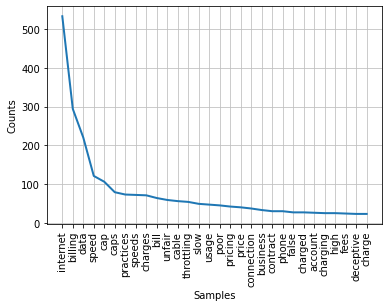

In [ ]:
import nltk
from nltk import FreqDist
cats = fcc_df['Customer Complaint'].apply(lambda verbatim: preprocess(verbatim))
filtered_complaints = [c for cl in cats for c in cl]
fdist = FreqDist(filtered_complaints)
print(fdist.most_common(30))
fdist.plot(30)

# Latent Dirichlet Allocation (LDA)

In [ ]:
import gensim
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)

print('Distinct words in initial documents:', len(dictionary))

dictionary.filter_extremes(no_below=10, no_above=0.3)

print('Distinct words after removing rare and common words:', len(dictionary))

Distinct words in initial documents: 7186
Distinct words after removing rare and common words: 1143


In [ ]:
!pip install gensim==3.8.0

In [ ]:
!pip install pyLDAvis==3.2.1

In [ ]:
from gensim.models import CoherenceModel, LdaModel
from pyLDAvis import gensim
import pyLDAvis

corpus = [dictionary.doc2bow(doc) for doc in docs if len(doc)>1]
num_topics = 8

# Check for .pickle
filename = 'lda_model.pickle'
model = []
found = False
try: 
    infile = open(filename,'rb')
    model = pickle.load(infile)
    infile.close()
    found = True
    print('Model found..loaded.')
except:
    print('Model not found!')

if not found:
    %time model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, workers=2)
    outfile = open(filename,'wb')
    pickle.dump(model, outfile)
    outfile.close()

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(model, corpus, dictionary)

# Evaluating the model

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

fcc_df_super = fcc_df.copy()

fcc_df_super['Tokens'] = docs

docs_upper = fcc_df_super['Tokens'].apply(lambda l: l[:int(len(l)/2)])
docs_lower = fcc_df_super['Tokens'].apply(lambda l: l[int(len(l)/2):])

In [ ]:
corpus_upper = [dictionary.doc2bow(doc) for doc in docs_upper]
corpus_lower = [dictionary.doc2bow(doc) for doc in docs_lower]

lda_corpus_upper = model[corpus_upper]
lda_corpus_lower = model[corpus_lower]

In [ ]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False): 
    top_dist =[]
    keys = []
    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [np.asarray(vals)]
        if kwords:
            keys += [np.asarray(vals).argmax()]

    return np.asarray(top_dist), keys

In [ ]:
top_dist_upper, _ = get_doc_topic_dist(model, lda_corpus_upper)
top_dist_lower, _ = get_doc_topic_dist(model, lda_corpus_lower)

print("Intra-similarity:", np.mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1, c2 in zip(top_dist_upper, top_dist_lower)]))

random_pairs = np.random.randint(0, len(fcc_df_super['Description']), size=(400, 2))

print("Inter-similarity:", np.mean([cosine_similarity(top_dist_upper[0].reshape(1, -1), top_dist_lower[1].reshape(1, -1))]))

# Labeling the Topics

In [ ]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in model.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

cable                0.058
price                0.046
package              0.035
month                0.031
bill                 0.027
dollars              0.022
lower                0.016
increase             0.015
television           0.014
cost                 0.013

Topic 1

bill                 0.060
month                0.031
told                 0.023
account              0.023
billing              0.016
pay                  0.016
called               0.016
said                 0.015
credit               0.014
charges              0.013

Topic 2

data                 0.070
cap                  0.037
gb                   0.031
usage                0.027
month                0.023
limit                0.016
use                  0.016
caps                 0.014
area                 0.012
netflix              0.010

Topic 3

told                 0.025
called               0.024
time                 0.018
tech                 0.017
phone     

In [ ]:
top_labels = {0: 'Pricing', 1:'Billing', 2:'Data Caps', 3:'Missed Appointments', 4:'Moving Services', 5: 'Customer Services', 6:'Internet Speed', 7: 'Business Contracts'}

# tf-idf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',
                                  tokenizer=preprocess, ngram_range=(1,3), min_df=40, max_df=0.20,
                                  norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

dtm = tvectorizer.fit_transform(fcc_df_super['Description']).toarray()

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nt'] not in stop_words.
  warnings.warn(


In [ ]:
top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
features = tvectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
top_words = []
for n in range(len(dtm)):
    inds = np.int0(np.argsort(dtm[n])[::-1][:4])
    top_words += [', '.join([feat ures[i] for i in inds])]
    
fcc_df_super['Description Top Words'] = pd.DataFrame(top_words)
fcc_df_super['Topic'] = pd.DataFrame(lda_keys)
fcc_df_super['Topic'].fillna(-1, inplace=True)
fcc_df_super.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description,Tokens,Description Top Words,Topic
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...,"[contacting, internet, technical, support, mon...","resolution, support, resolve, internet speed",4
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...,"[january, payments, january, february, advance...","payment, care, number, account",1
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...,"[home, located, acworth, georgia, signed, year...","high speed internet, billed, high speed, speed...",7
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...,"[atlanta, area, effect, unprecendented, usage,...","gb, usage, cap, area",2
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...,"[sort, years, like]","years, like, good, free",6


# t-SNE Visualization

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(top_dist)

fcc_df_super['Description Truncated'] = fcc_df_super['Description'].apply(lambda x: x[0:140])
fcc_df_super['X_tsne'] = X_tsne[:,0]
fcc_df_super['Y_tsne'] = X_tsne[:,1]

fcc_df_super['Colors'] = fcc_df_super['Topic'].apply(lambda topic_num: peacock_theme[topic_num])

source = ColumnDataSource(dict(
    x=fcc_df_super['X_tsne'],
    y=fcc_df_super['Y_tsne'],
    color=fcc_df_super['Colors'],
    label=fcc_df_super['Topic'].apply(lambda t: top_labels[t]),
    old_topic=fcc_df_super['Customer Complaint'],
    top_words=fcc_df_super['Description Top Words'],
    description=fcc_df_super['Description Truncated']))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
title = 'Visualization of Topics'
plot_tsne = figure(plot_width=1000, plot_height=600, title=title,
                   tools=['pan', 'wheel_zoom', 'save', 'hover'], tooltips=[("Old Topic","@old_topic"),
                                                                           ("Description","@description"),
                                                                           ("Top Words","@top_words")])

plot_tsne.scatter(x='x', y='y', legend_field='label', source=source, color='color', alpha=0.6, size=5.0)
plot_tsne.legend.location = "top_right"

show(plot_tsne)